In [1]:
from selenium import webdriver
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.common.exceptions import TimeoutException

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
url= 'https://www.tipranks.com/trending-stocks'

In [4]:
browser= webdriver.Chrome()

In [5]:
browser.get(url)

In [6]:
# Creating a CLASs that iterates over the Browser element
class get_element(object):
    
    # initializing
    # locator: to locate elements
    # n: to get the NUMBER of elements
    def __init__(self, locator, n):
        self.locator= locator
        self.n= n
        
    # call function for Iteration using the BROWSER to find element by LOCATING each WEB element
    def __call__(self, browser):
        
        element= browser.find_elements(*self.locator)
        
        # compare the number of elements
        if len(element) >= self.n:
            return element
        else:
            return False

In [7]:
# BROWSER waiting time
# WAIT for atleast 10 seconds
browser.implicitly_wait(10)

In [8]:
# LOCATE the searched CONTENTS wherre the ITERATION will take place
# DIV element from the Content
div_element= browser.find_element_by_xpath('//*[@id="app"]/div/div/main/div/div/div[2]/div[2]/div/div/div[1]/ul')

In [9]:
# LOCATE each INDIVIDUAL element from the WEB element

# stock INFO:
locator_stock_info= (By.CLASS_NAME,'client-components-ratings-trending-stock-row__stockInfo')

# stock Consensus 
locator_stock_consensus= (By.CLASS_NAME,'client-components-ratings-trending-stock-row__consensus')

# stock Target Price
locator_stoc_tgt_price= (By.CLASS_NAME, 'client-components-ratings-trending-stock-row__priceTarget')

In [10]:
# iteration of each element
stock_info_cnt=0
stock_cons_cnt= 0
stock_price_cnt= 0

# RECORDS of empty list
stock_info_rec= []
stock_info_cons= []
stock_info_price= []


# create while loop 
while True:
    
    # use browser script for iteration over the browser DIV element 
    browser.execute_script(
    'arguments[0].scrollTop= arguments[0].scrollHeight', div_element
    )
    
    # use TRY and catch error method to ITERATE using the CLASS 
    
    try:
        # RECORD each iteration and wait for 3 seconds until ITERATIng other element
        stock_info= WebDriverWait(browser, 3).until(
            # USING THe located elmenets from the SECtion
            get_element(locator_stock_info, stock_info_cnt +1)
        )
        
        # stock consesnus
        stock_cons= WebDriverWait(browser, 3).until(
            get_element(locator_stock_consensus, stock_cons_cnt +1)
        )
        
        # stock PRICE target
        stock_tgt_price= WebDriverWait(browser, 3).until(
            get_element(locator_stoc_tgt_price, stock_price_cnt +1)
        )
        
    except TimeoutException as EC:
        break
        
    # update the COLLECTED record info UNLESS returns FALSE
    # number of RECORDS collected 
    stock_info_cnt= len(stock_info)
    stock_cons_cnt= len(stock_cons)
    stock_price_cnt= len(stock_tgt_price)
    
    for single_stock_info in stock_info:
        stock_info_rec.append(single_stock_info.text)
        
    for single_stock_cons in stock_cons:
        stock_info_cons.append(single_stock_cons.text)
        
    for single_stock_price in stock_tgt_price:
        stock_info_price.append(single_stock_price.text)  
    

In [11]:
# QUIT
browser.quit()

In [12]:
len(stock_info_price), len(stock_info_cons), len (stock_info_rec)

(21, 21, 21)

# Creating the DATAFRAME

In [13]:

df_stock_rec= pd.DataFrame({'Stock_info': stock_info_rec, 'Price_Target':stock_info_price, 'Consensus': stock_info_cons })

In [14]:
df_stock_rec= df_stock_rec.drop(df_stock_rec.index[0])
df_stock_rec

,Stock_info,Price_Target,Consensus
1,2 days ago\nAirbnb(ABNB)\n169.999.19(5.72%),$154.92,Moderate Buy
2,9 days ago\nNike(NKE)\n143.042.01(1.39%),$163.07,Strong Buy
3,5 days ago\nMicron(MU)\n79.910.45(0.57%),$96.92,Strong Buy
4,6 days ago\nDarden(DRI)\n124.862.47(1.94%),$126.92,Moderate Buy
5,Today\nTesla(TSLA)\n854.414.97(0.59%),$534.63,Hold
6,Yesterday\nSarepta Therapeutics(SRPT)\n87.220....,$129.27,Moderate Buy
7,2 days ago\nChange Healthcare(CHNG)\n23.910.11...,$24.66,Hold
8,6 days ago\nFedEx(FDX)\n252.223.18(1.28%),$332.71,Moderate Buy
9,Today\nIntel(INTC)\n56.953.71(6.97%),$54.15,Hold
10,Today\nTwitter(TWTR)\n47.220.18(0.38%),$51.08,Moderate Buy


# Feature Engineering
- Extract Stock symbols
- Extract Stock Upgrade Time
- Extract Stock Current Price
- Change Data Type. EG: Stock Price (Object) --> Float

In [15]:
import re # Regular Expression COMPILER

# EXMPLE of RAW DATA

In [16]:
MU= df_stock_rec.iloc[2, 0]
MU

'5 days ago\nMicron(MU)\n79.910.45(0.57%)'

# Creating a Function that will COMPILE and MANIPULATE the STRINGS that has been EXTRACTED

# 1. Stock Symbol Extract

In [17]:
def extract_sym(stk):
    
    # checks over the strings that are UPPERCASE repeated Consecutively
    split_wd= re.compile('\(+[A-Z]+\)')
    symbl= split_wd.findall(stk)

    # Stored on LIST
    symbl_extracted= symbl[0]

    # Replace any Signs
    new_sym= symbl_extracted.replace('(','')
    new_sym= new_sym.replace(')','')
    return new_sym

In [18]:
stk_id= df_stock_rec.iloc[8, 0]
extract_sym(stk_id)

'INTC'

In [19]:
# EMPTY list for STOCK symbols
stock_symbol= []

for stock_num in range(len(df_stock_rec)):
    #print(df_stock_rec.iloc[stock_num, 0],'\n*****')
    
    stock_id= df_stock_rec.iloc[stock_num, 0]
    # adding the SYMBOLS in a new LIST
    stock_symbol.append(extract_sym(stock_id))

In [20]:
stock_symbol

['ABNB',
 'NKE',
 'MU',
 'DRI',
 'TSLA',
 'SRPT',
 'CHNG',
 'FDX',
 'INTC',
 'TWTR',
 'PANW',
 'STZ',
 'GILD',
 'PAYX',
 'ZS',
 'DASH',
 'BABA',
 'PTON',
 'AAPL',
 'LB']

# CREATING a new column on DATA FRAME

In [21]:
df_stock_rec['stock']= pd.Series(stock_symbol, index= df_stock_rec.index)

In [22]:
df_stock_rec.iloc[0, 1]

'$154.92'

# REMOVE expression from Price_Target Column
# Change the Data Type of 'Price_Target' Column

In [23]:
# REMOVE '$' SIGN 

for dollar in range(len(df_stock_rec['Price_Target'])):
    df_stock_rec['Price_Target']= df_stock_rec['Price_Target'].str.replace('$','')

In [24]:
# Change Data Type of Price Target Values

for dollar in range(len(df_stock_rec['Price_Target'])):
    df_stock_rec['Price_Target']= df_stock_rec['Price_Target'].astype(float)
    
df_stock_rec

,Stock_info,Price_Target,Consensus,stock
1,2 days ago\nAirbnb(ABNB)\n169.999.19(5.72%),154.92,Moderate Buy,ABNB
2,9 days ago\nNike(NKE)\n143.042.01(1.39%),163.07,Strong Buy,NKE
3,5 days ago\nMicron(MU)\n79.910.45(0.57%),96.92,Strong Buy,MU
4,6 days ago\nDarden(DRI)\n124.862.47(1.94%),126.92,Moderate Buy,DRI
5,Today\nTesla(TSLA)\n854.414.97(0.59%),534.63,Hold,TSLA
6,Yesterday\nSarepta Therapeutics(SRPT)\n87.220....,129.27,Moderate Buy,SRPT
7,2 days ago\nChange Healthcare(CHNG)\n23.910.11...,24.66,Hold,CHNG
8,6 days ago\nFedEx(FDX)\n252.223.18(1.28%),332.71,Moderate Buy,FDX
9,Today\nIntel(INTC)\n56.953.71(6.97%),54.15,Hold,INTC
10,Today\nTwitter(TWTR)\n47.220.18(0.38%),51.08,Moderate Buy,TWTR


In [25]:
df_stock_rec.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Stock_info    20 non-null     object 
 1   Price_Target  20 non-null     float64
 2   Consensus     20 non-null     object 
 3   stock         20 non-null     object 
dtypes: float64(1), object(3)
memory usage: 800.0+ bytes


# 2. Time of Stock Upgrade

# 3. Current Stock Price

In [26]:
MU # EXAMPLE, info to EXTRACT

'5 days ago\nMicron(MU)\n79.910.45(0.57%)'

In [27]:
def extract_time_stk_upgrade(stk):
    
    # checks over the strings that are UPPERCASE repeated Consecutively
    split_wd= re.compile('[a-z][0-9]+\(')
    symbl= split_wd.findall(stk)

    # Stored on LIST
    symbl_extracted= symbl[0]

    # Replace any Signs
    new_sym= symbl_extracted.replace('(','')
    new_sym= new_sym.replace(')','')
    return new_sym

In [36]:
MU

'5 days ago\nMicron(MU)\n79.910.45(0.57%)'

In [60]:
stk_cur_price= re.compile('n[0-9].[0-9].')
stk_cur_price.findall(MU)

['9.91', '0.45', '0.57']

# SCATTER PLOT:
- Actual Market Price and Target Price

In [30]:
import seaborn as sns; sns.set()

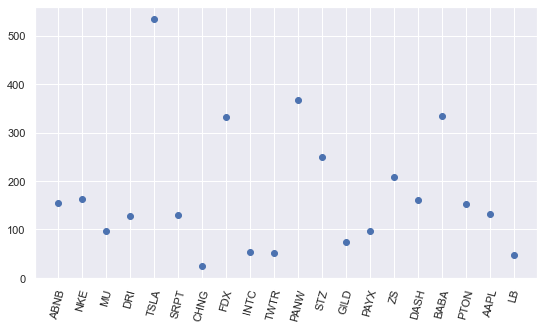

In [31]:
plt.scatter(df_stock_rec['stock'], df_stock_rec['Price_Target'])
plt.gcf().set_size_inches(9,5)
plt.xticks(rotation= 75);